In [4]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

In [5]:
#Import API key
from config import weather_api_key

In [6]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [7]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [8]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#  Generate Cities List

In [9]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

# Perform API Calls

In [10]:
#Perform a weather check on each city using a series of successive API calls.

#Indicate the url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

#Build Partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [17]:
#Set up url & lists to hold response info

url = "http://api.openweathermap.org/data/2.5/weather?=units=Imperial&APPID=" + weather_api_key

city_name = []
lat = [] 
lon = [] 
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = [] 
date = []


#loop through the list of cities and perform a request for data on each

counter = 1

print(f'Beginning Data Retrieval')
print(f'---------------------')

for city in cities:
    query_url = f"{url}&q={city}"
    
    try:
        response = requests.get(query_url).json()
        #print(response)
        
        time.sleep(1)
        
        city_name.append(response["name"]) 
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response['dt']) 
    
        print(f"Processing Record {counter}  | {city}")
        #print(f"{url}&q={city}")
        
        counter = counter + 1
        
    except:
        print("City not found. Skipping...")
        pass

print(f'---------------------')
print(f'Data Retrieval Complete')
print(f'---------------------')


Beginning Data Retrieval
---------------------
Processing Record 1  | rio grande
City not found. Skipping...
Processing Record 2  | hermanus
Processing Record 3  | qaanaaq
Processing Record 4  | avera
Processing Record 5  | rikitea
Processing Record 6  | anadyr
Processing Record 7  | narbonne
Processing Record 8  | saint-francois
Processing Record 9  | saint-philippe
Processing Record 10  | hirara
Processing Record 11  | saldanha
Processing Record 12  | albany
Processing Record 13  | dikson
Processing Record 14  | punta arenas
Processing Record 15  | kapaa
Processing Record 16  | belvedere marittimo
Processing Record 17  | puerto ayora
Processing Record 18  | jamestown
Processing Record 19  | ushuaia
Processing Record 20  | hilo
Processing Record 21  | vaini
Processing Record 22  | pisco
Processing Record 23  | svetlaya
City not found. Skipping...
City not found. Skipping...
Processing Record 24  | busselton
Processing Record 25  | provideniya
Processing Record 26  | severo-kurilsk
Pro

Processing Record 228  | mount gambier
Processing Record 229  | tessalit
Processing Record 230  | kutum
Processing Record 231  | kieta
Processing Record 232  | shushtar
Processing Record 233  | mahebourg
Processing Record 234  | faya
City not found. Skipping...
Processing Record 235  | cabo san lucas
Processing Record 236  | srednekolymsk
Processing Record 237  | ballina
Processing Record 238  | sangmelima
Processing Record 239  | roseburg
Processing Record 240  | teahupoo
Processing Record 241  | hobyo
Processing Record 242  | imbituba
City not found. Skipping...
Processing Record 243  | san patricio
Processing Record 244  | zernograd
Processing Record 245  | sorong
Processing Record 246  | samarai
Processing Record 247  | gubkinskiy
Processing Record 248  | ahuimanu
Processing Record 249  | kavieng
Processing Record 250  | mamontovo
Processing Record 251  | kristinehamn
Processing Record 252  | ancud
Processing Record 253  | lasa
Processing Record 254  | bambous virieux
Processing Re

Processing Record 452  | zeya
Processing Record 453  | balsas
Processing Record 454  | katav-ivanovsk
Processing Record 455  | gravdal
Processing Record 456  | aktau
Processing Record 457  | dhidhdhoo
Processing Record 458  | meliti
Processing Record 459  | iberia
Processing Record 460  | manta
Processing Record 461  | mabaruma
Processing Record 462  | beloha
Processing Record 463  | aguimes
Processing Record 464  | leningradskiy
Processing Record 465  | chenzhou
Processing Record 466  | kilindoni
City not found. Skipping...
Processing Record 467  | paramonga
Processing Record 468  | hlukhiv
Processing Record 469  | atar
Processing Record 470  | krapivinskiy
Processing Record 471  | evensk
Processing Record 472  | haverhill
Processing Record 473  | suntar
Processing Record 474  | zhezkazgan
City not found. Skipping...
Processing Record 475  | hit
Processing Record 476  | marinette
Processing Record 477  | kaputa
Processing Record 478  | russell
Processing Record 479  | dinghai
Processi

In [19]:
#Create a dataframe from cities, lat, lng, max temp, humidity, coloudiness, wind speed, country, date
weather_dict = {
    "City": city_name, 
    "Lat": lat,
    "Lng": lon,
    "Max temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed, 
    "Country": country,
    "Date": date
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rio Grande,-32.0350,-52.0986,300.15,50,20,4.12,BR,1615558960
1,Hermanus,-34.4187,19.2345,296.48,67,100,0.45,ZA,1615558962
2,Qaanaaq,77.4840,-69.3632,257.07,69,100,0.77,GL,1615558964
3,Avera,33.1940,-82.5271,291.48,82,1,2.06,US,1615558965
4,Rikitea,-23.1203,-134.9692,299.29,76,100,3.78,PF,1615558966


In [20]:
weather_data.count()

City          571
Lat           571
Lng           571
Max temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [21]:
#Save as a csv
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)

In [22]:
#Read in the csv file
cities_weather = pd.read_csv("weather_data.csv")
cities_weather.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rio Grande,-32.0350,-52.0986,300.15,50,20,4.12,BR,1615558960
1,Hermanus,-34.4187,19.2345,296.48,67,100,0.45,ZA,1615558962
2,Qaanaaq,77.4840,-69.3632,257.07,69,100,0.77,GL,1615558964
3,Avera,33.1940,-82.5271,291.48,82,1,2.06,US,1615558965
4,Rikitea,-23.1203,-134.9692,299.29,76,100,3.78,PF,1615558966


# Plotting the Data

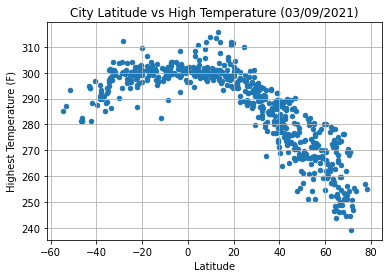

In [23]:
#Build a scatter plot for Temp (F) vs Latitude
plt.scatter(cities_weather["Lat"], cities_weather["Max temp"], marker="o", s=20)

#Label the scatter plot
plt.title("City Latitude vs High Temperature (03/09/2021)")
plt.ylabel("Highest Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the scatter plot
plt.savefig("Latitude_Temperature.png")

#Show plot
plt.show()

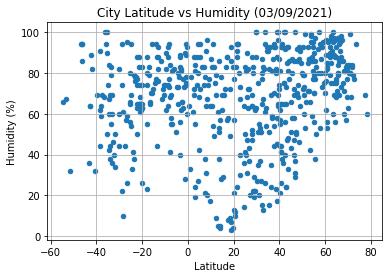

In [100]:
#Build a scatter plot for Humidity vs Latitude
plt.scatter(cities_weather["Lat"], cities_weather["Humidity"], marker="o", s=20)

#Label the scatter plot
plt.title("City Latitude vs Humidity (03/09/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the scatter plot
plt.savefig("Latitude_Humidity.png")

#Show plot
plt.show()

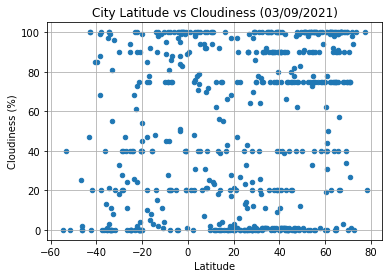

In [101]:
#Build a scatter plot for Cloudiness vs Latitude
plt.scatter(cities_weather["Lat"], cities_weather["Cloudiness"], marker="o", s=20)

#Label the scatter plot
plt.title("City Latitude vs Cloudiness (03/09/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the scatter plot
plt.savefig("Latitude_Cloudiness.png")

#Show plot
plt.show()

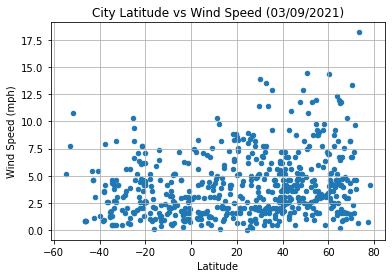

In [102]:
#Build a scatter plot for Wind Speed (mph) vs Latitude
plt.scatter(cities_weather["Lat"], cities_weather["Wind Speed"], marker="o", s=20)

#Label the scatter plot
plt.title("City Latitude vs Wind Speed (03/09/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the scatter plot
plt.savefig("Latitude_WindSpeed.png")

#Show plot
plt.show()

# Linear Regression

In [103]:
#Create dataframe for northern and southern hempisphere
northern_hemp = cities_weather.loc[cities_weather["Lat"] >=0]
northern_hemp.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Qaanaaq,77.4840,-69.3632,257.07,69,100,0.77,GL,1615558964
3,Avera,33.1940,-82.5271,291.48,82,1,2.06,US,1615558965
5,Anadyr,64.7500,177.4833,271.15,93,90,12.00,RU,1615558968
6,Arrondissement de Narbonne,43.0833,2.8333,289.82,47,75,4.63,FR,1615558969
7,Saint-François,46.4154,3.9054,286.48,58,75,4.63,FR,1615558970


In [104]:
southern_hemp = cities_weather.loc[cities_weather["Lat"] < 0]
southern_hemp.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rio Grande,-32.0350,-52.0986,300.15,50,20,4.12,BR,1615558960
1,Hermanus,-34.4187,19.2345,296.48,67,100,0.45,ZA,1615558962
4,Rikitea,-23.1203,-134.9692,299.29,76,100,3.78,PF,1615558966
8,Saint-Philippe,-21.3585,55.7679,300.15,65,0,7.72,RE,1615558972
10,Saldanha,-33.0117,17.9442,301.15,36,81,4.63,ZA,1615558814


y = -0.75x + 310.94
R squared: 0.7981783543916398


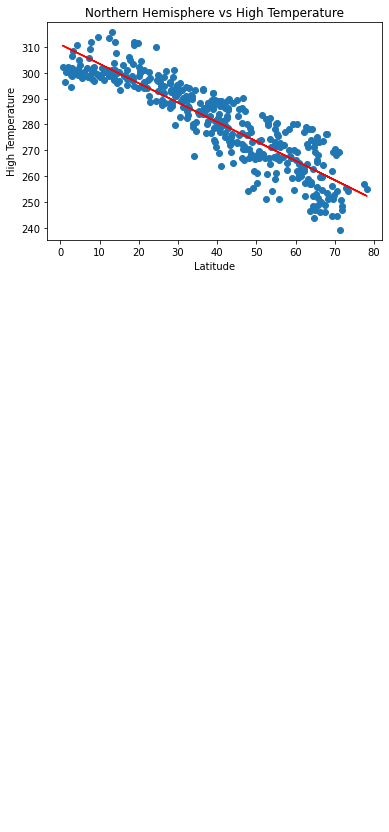

In [128]:
#Northern Hempisphere - Latitude vs. Max Temp Linear Regression

#Indicate the x and y values
x_values = northern_hemp['Lat'].astype('float')
y_values = northern_hemp['Max temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,10), fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('High Temperature')
plt.title("Northern Hemisphere vs High Temperature")

# Print r square value
print(f"R squared: {rvalue**2}")

#Save the scatter plot
plt.savefig("Northern Hemisphere vs Temperature.png")

# Show plot
plt.show()


y = 0.23x + 302.72
R squared: 0.3055323498187544


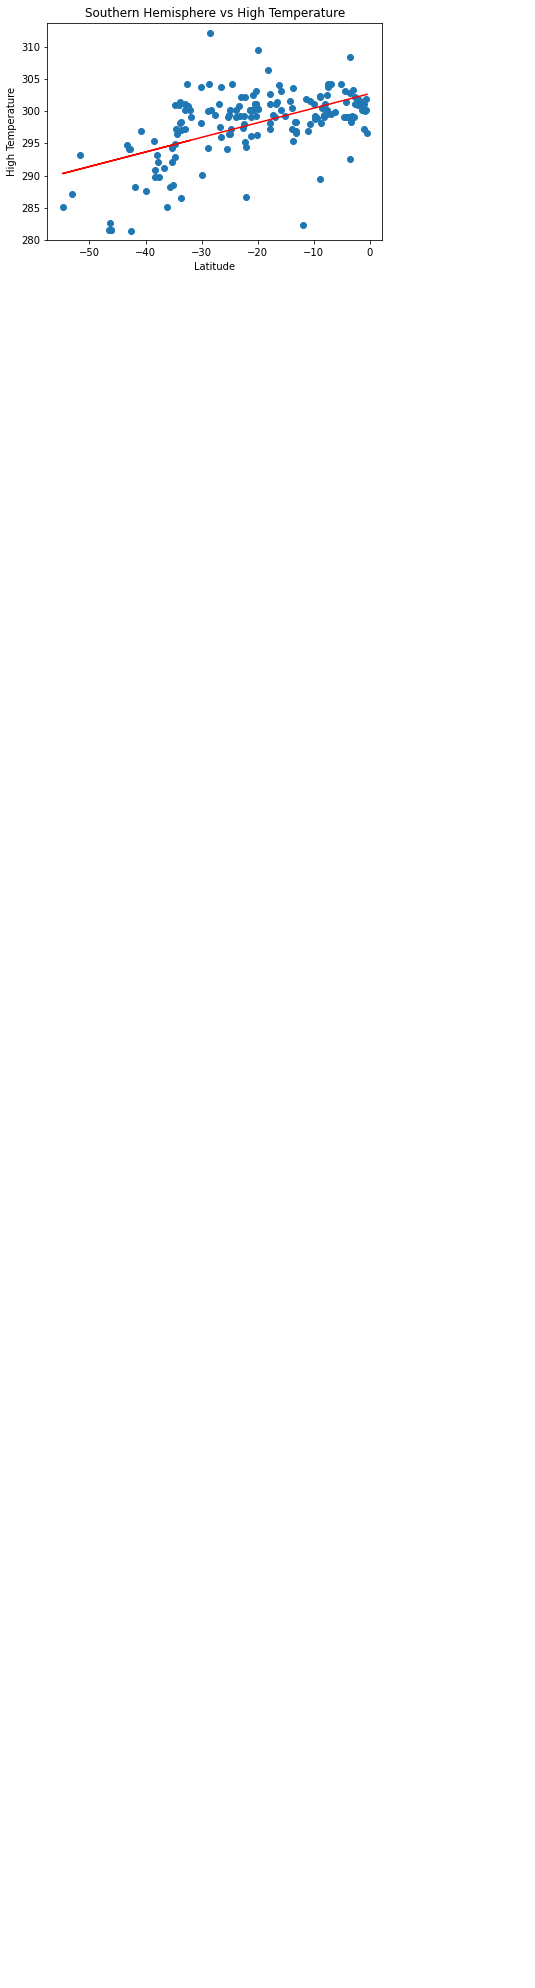

In [132]:
#Southern Hempisphere - Latitude vs. Max Temp Linear Regression

#Indicate the x and y values
x_values = southern_hemp['Lat'].astype('float')
y_values = southern_hemp['Max temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,10),fontsize=15,color="red")
plt.title("Southern Hemisphere vs High Temperature")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('High Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

#Save the scatter plot
plt.savefig("Southern Hemisphere vs Temperature.png")

# Show plot
plt.show()


y = 0.42x + 50.91
R squared: 0.11982209350509306


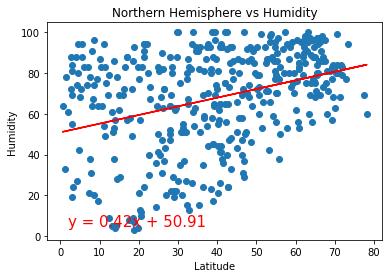

In [133]:
#Northern Hempisphere - Latitude vs. Humidity Linear Regression

#Indicate the x and y values
x_values = northern_hemp['Lat'].astype('float')
y_values = northern_hemp['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,5),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere vs Humidity")

# Print r square value
print(f"R squared: {rvalue**2}")

#Save the scatter plot
plt.savefig("Northern Hemisphere vs Humidity.png")

# Show plot
plt.show()

y = 0.24x + 73.34
R squared: 0.029431659813044093


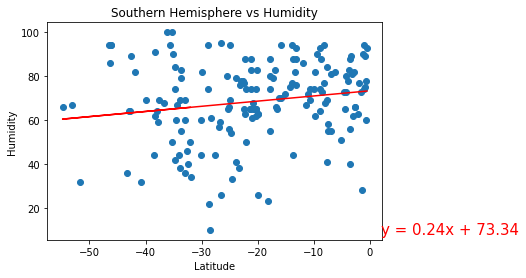

In [134]:
#Southern Hempisphere - Latitude vs. Humidity Linear Regression

#Indicate the x and y values
x_values = southern_hemp['Lat'].astype('float')
y_values = southern_hemp['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,8),fontsize=15,color="red")
plt.title("Southern Hemisphere vs Humidity")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

#Save the scatter plot
plt.savefig("Southern Hemisphere vs Humidity.png")

# Show plot
plt.show()

y = 0.47x + 34.95
R squared: 0.05331452204540821


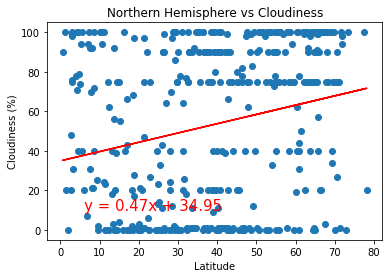

In [135]:
#Northern Hempisphere - Latitude vs. Cloudines Linear Regression

#Indicate the x and y values
x_values = northern_hemp['Lat'].astype('float')
y_values = northern_hemp['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere vs Cloudiness")

# Print r square value
print(f"R squared: {rvalue**2}")

#Save the scatter plot
plt.savefig('Northern Hemisphere vs Cloudiness.png')

# Show plot
plt.show()


y = 0.89x + 65.43
R squared: 0.0910681285556639


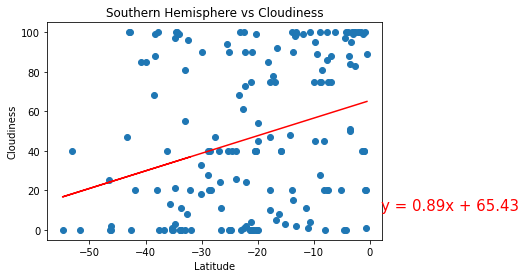

In [136]:
#Southern Hempisphere - Latitude vs. Cloudiness Linear Regression

#Indicate the x and y values
x_values = southern_hemp['Lat'].astype('float')
y_values = southern_hemp['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere vs Cloudiness")

# Print r square value
print(f"R squared: {rvalue**2}")

#Save the scatter plot
plt.savefig("Southern Hemisphere vs Cloudiness.png")

# Show plot
plt.show()

y = 0.02x + 3.55
R squared: 0.021517231716903357


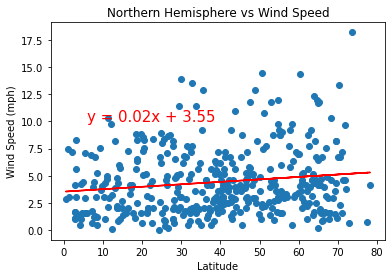

In [137]:
#Northern Hempisphere - Latitude vs. Wind Speed Linear Regression

#Indicate the x and y values
x_values = northern_hemp['Lat'].astype('float')
y_values = northern_hemp['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hemisphere vs Wind Speed")

# Print r square value
print(f"R squared: {rvalue**2}")

#Save the scatter plot
plt.savefig("Northern Hemisphere vs Wind Speed.png")

# Show plot
plt.show()

y = -0.03x + 2.68
R squared: 0.02355029896664384


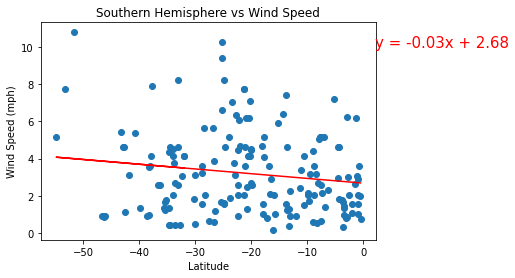

In [138]:
#Southern Hempisphere - Latitude vs. Wind Speed Linear Regression

#Indicate the x and y values
x_values = southern_hemp['Lat'].astype('float')
y_values = southern_hemp['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere vs Wind Speed")

# Print r square value
print(f"R squared: {rvalue**2}")

#Save the scatter plot
plt.savefig('Southern Hemisphere vs Wind Speed.png')

# Show plot
plt.show()